In [1]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils_week2 import plot_gaussian_model

frames_folder = '../data/images/'
TOTAL_FRAMES = 2141;
TRAIN_FRAMES = math.ceil(TOTAL_FRAMES * 0.25);
TEST_FRAMES = math.ceil(TOTAL_FRAMES * 0.75);

In [6]:
frames = np.zeros((TRAIN_FRAMES ,1080, 1920))
for i in range(1, TRAIN_FRAMES):
    frames[i, :, :] = cv2.imread(frames_folder + "%04d.jpeg" % i, cv2.IMREAD_GRAYSCALE);

mean = np.mean(frames, axis=0)
std = np.std(frames, axis=0)
np.save("../data/gaussian_model_mean.npy", mean)
np.save("../data/gaussian_model_std.npy", std)

/Users/kevinmartinfernandez/SharedFolder/M6_Video/Week2/utils_week2.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


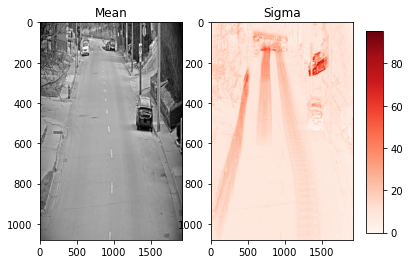

In [2]:
#Load gaussian model
mean = np.load('../data/gaussian_model_mean.npy')
std = np.load('../data/gaussian_model_std.npy')
plot_gaussian_model(mean, std)

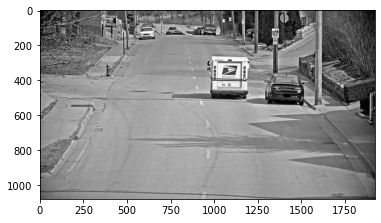

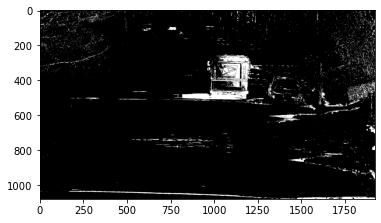

In [10]:
def classify_frame(u, std, frame, alpha=2.5):
    return (np.abs(frame - u) >= alpha * (std + 2)).astype(np.uint8) * 255

#Test classify
frame = cv2.imread(frames_folder + "%04d.jpeg" % 1800, cv2.IMREAD_GRAYSCALE);
plt.imshow(frame, cmap='gray')
plt.show()
plt.imshow(classify_frame(mean, std, frame, alpha=4), cmap='gray')
plt.show()

In [12]:
for i in range(TRAIN_FRAMES, TEST_FRAMES):
    frame = cv2.imread(frames_folder + "%04d.jpeg" % i, cv2.IMREAD_GRAYSCALE)
    classify = classify_frame(mean, std, frame, alpha=0.2)

    #frameRes = cv2.resize(frame, (960, 540))
    #cv2.imshow('Frame', frameRes)

    classiRes = cv2.resize(classify, (960, 540))
    cv2.imshow('Class', classiRes)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break
